In [195]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [196]:
df = pd.read_csv("Uber Request Data.csv")

In [197]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [198]:
print(df.describe(),'\n')
print(df.info(),'\n')
print(df.shape)

        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None 

(6745, 6)


## Cleaning the Data

-  ### Inspecting Null values

Finding the percentage of Null values in each column.

In [199]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [200]:
sum(df.duplicated(subset='Request id')) #to check if duplicate requests exist

0

In [201]:
round(df.isnull().mean() * 100,2) #percentage of null values

Request id            0.00
Pickup point          0.00
Driver id            39.29
Status                0.00
Request timestamp     0.00
Drop timestamp       58.03
dtype: float64

###  Formatting request timestamp and drop timestamp columns

In [202]:
df["Request timestamp"] = pd.to_datetime(df["Request timestamp"],dayfirst=True)
df["Drop timestamp"] = pd.to_datetime(df["Drop timestamp"],dayfirst=True)

In [203]:
df['Weekday'] = df['Request timestamp'].dt.day_name()
df['Rq_hour'] = df['Request timestamp'].dt.hour

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
Weekday              6745 non-null object
Rq_hour              6745 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 421.6+ KB


## Visualizations 

##### A count plot can be thought of as a histogram across a categorical, instead of quantitative variable.

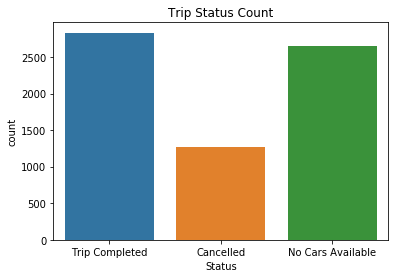

In [205]:
# plotting graph for trip status
plt.title('Trip Status Count')
sns.countplot(x=df['Status'])

### the above plot shows large numbers of no cars available which is affecting revenue

## Peak hours

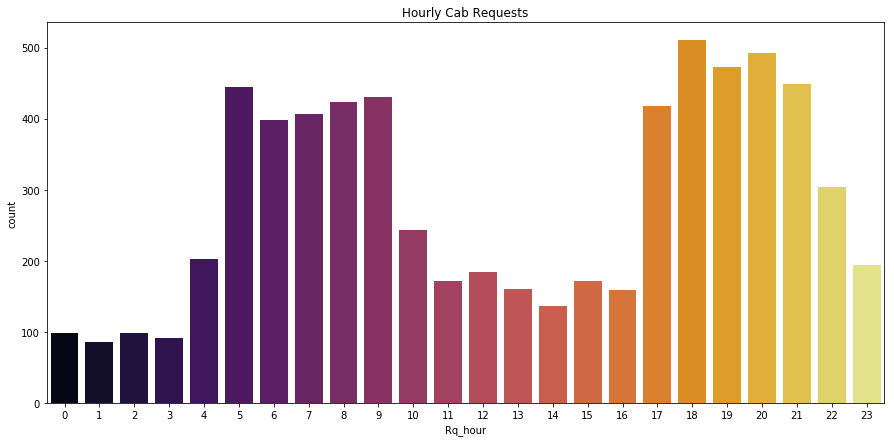

In [206]:
# plot data to show status count for each hour
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Hourly Cab Requests")
#ax = sns.countplot(x='Rq_hour',hue='Status',palette="inferno",data=df)
ax = sns.countplot(x='Rq_hour',palette="inferno",data=df)
#plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

### the above plot shows hourly trip status and large demand during morning and evening hours

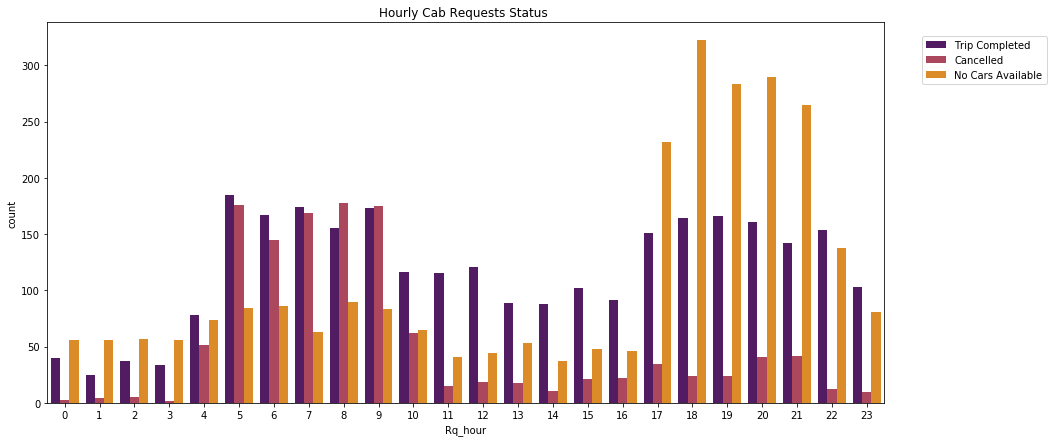

In [207]:
# Trip status count for each hour
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Hourly Cab Requests Status ")
ax = sns.countplot(x='Rq_hour',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

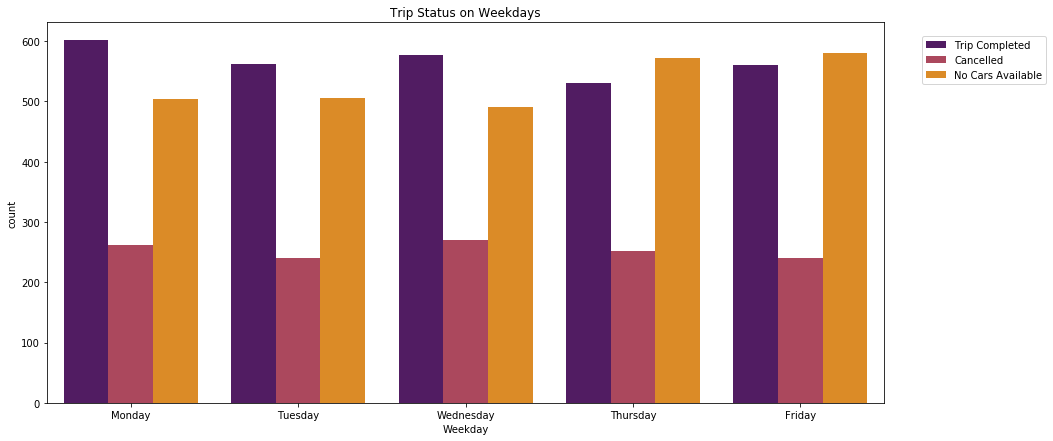

In [208]:
#Trip status count for each day of the week
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Trip Status on Weekdays")
ax = sns.countplot(x='Weekday',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

### There is not much difference between the Status of the rides during the weekdays.Therefore, supply-demand is not affected by day of the week.

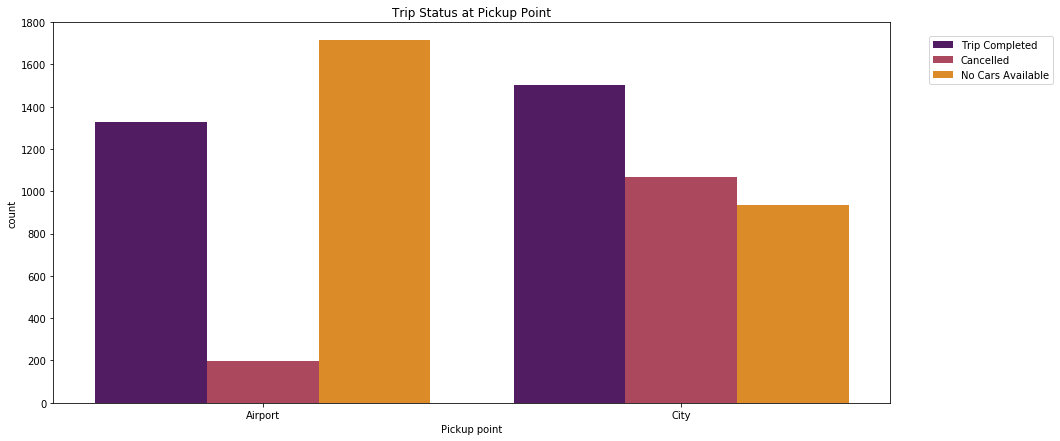

In [209]:
# Trip status count for pickup point
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Trip Status at Pickup Point")
ax = sns.countplot(x='Pickup point',hue='Status',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

### the above plot shows unavailability of large number of cabs at airport

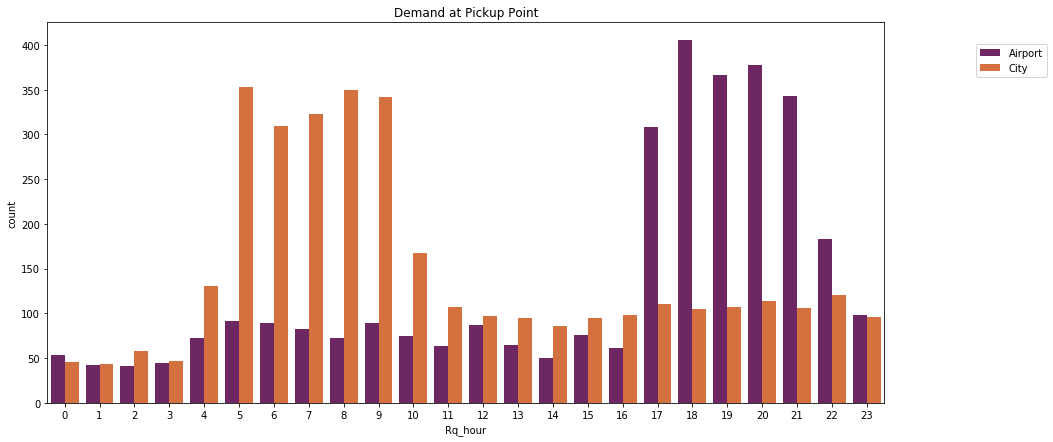

In [210]:
# Total Demand for pickup point hourwise
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Demand at Pickup Point")
ax = sns.countplot(x='Rq_hour',hue='Pickup point',palette="inferno",data=df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

### Above plot shows hourly Demand for pickup point
### It shows large demand of cabs at city during morning hours and at airport during evening hours

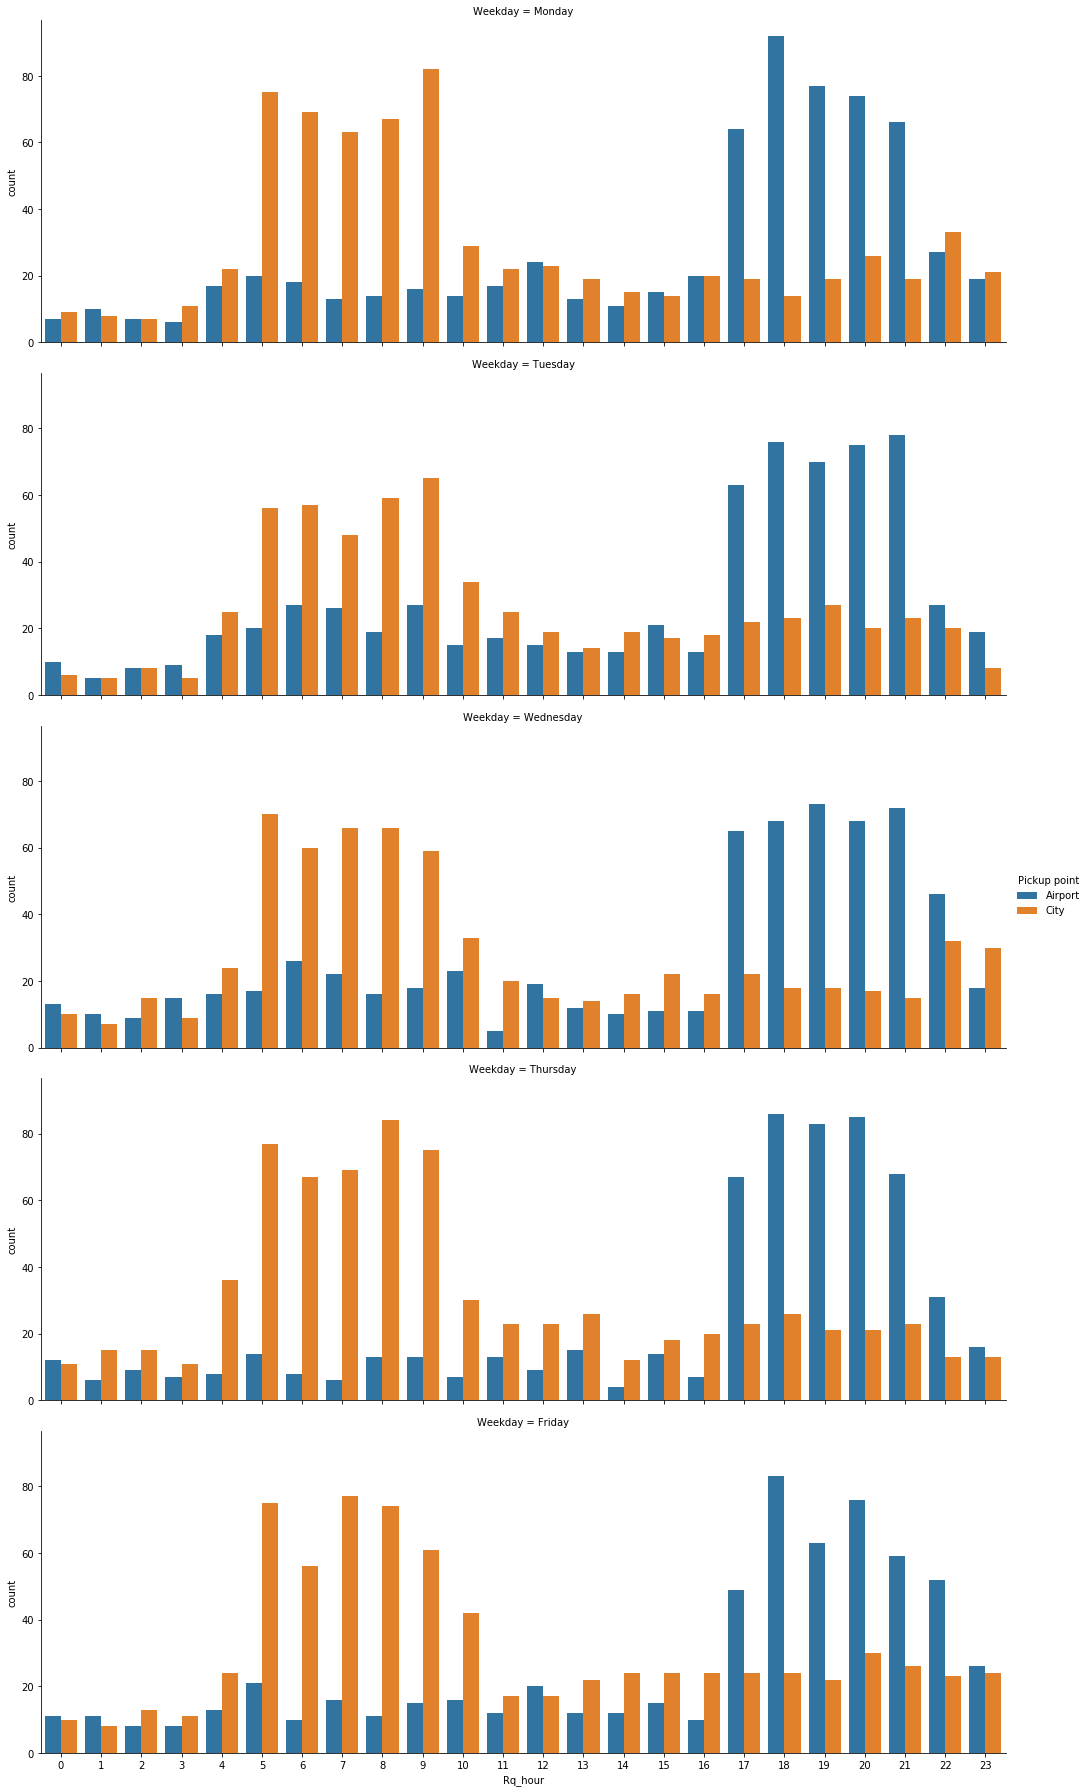

In [211]:
# hourly cab demand on weekdays at pickup point
sns.catplot(x = "Rq_hour", hue = "Pickup point",row="Weekday",data = df, kind = "count",aspect=2.8)

### above plot shows hourly cab demand on weekdays at pickup point

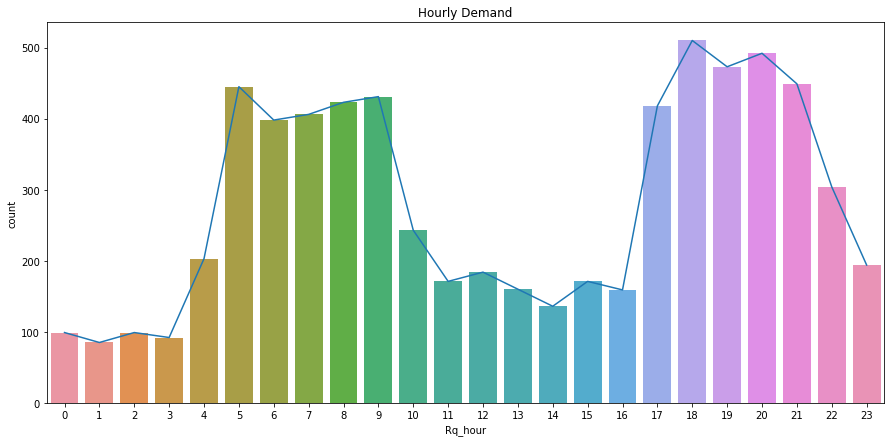

In [213]:
# plot data to show hourly distribution of request/demand
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Hourly Demand')
a=df.groupby(df['Rq_hour']).count()['Request id'].plot(ax=ax)
#df.groupby(df['Rq_hour']).count()['Request id'].plot(ax=ax)
ax=sns.countplot(x=df['Rq_hour'])

### Peak hours for cab requests lie between 5AM to 9AM and between 5PM to 9PM. 

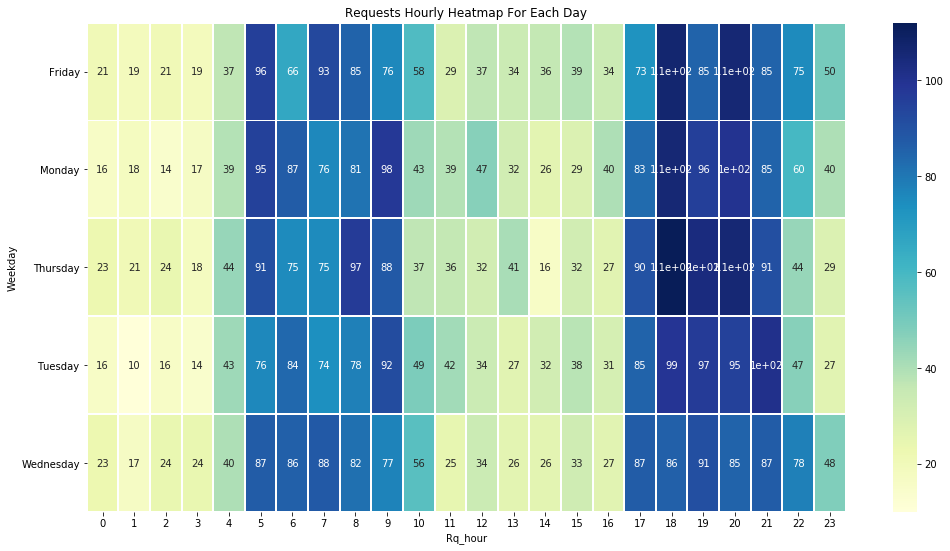

In [214]:
#Heatmap data for requests with weekdays and hours
heat_data_demand = df.groupby(['Weekday', 'Rq_hour']).size().reset_index()
heat_data_demand.columns = ['Weekday', 'Rq_hour', 'Hourly Count']
# plot data to show hourly request heatmap
fig, ax = plt.subplots(figsize=(17,9))

plt.title('Requests Hourly Heatmap For Each Day')
sns.heatmap(heat_data_demand.pivot('Weekday', 'Rq_hour', 'Hourly Count'), linewidths=1, cmap="YlGnBu",annot=True)
plt.yticks(rotation=0)
plt.show()

## Both of these Heatmaps tell the same story. Uber cannot keep up with the demand at the peak request hours. It will be a good idea now to see the location of the demand vs supply gap i.e. Airport or the City.

## Time Slots

In [217]:
# dividing request hours into time slots
def per(x):
    if x<5:
        return "Early Morning"
    elif 5 <= x < 10:
        return "Morning"
    elif 10 <= x < 17:
        return "Day"
    elif 17 <= x < 22:
        return "Evening"
    else:
        return "Night"
    
df["time_slot"] = df.Rq_hour.apply(lambda x:per(x))

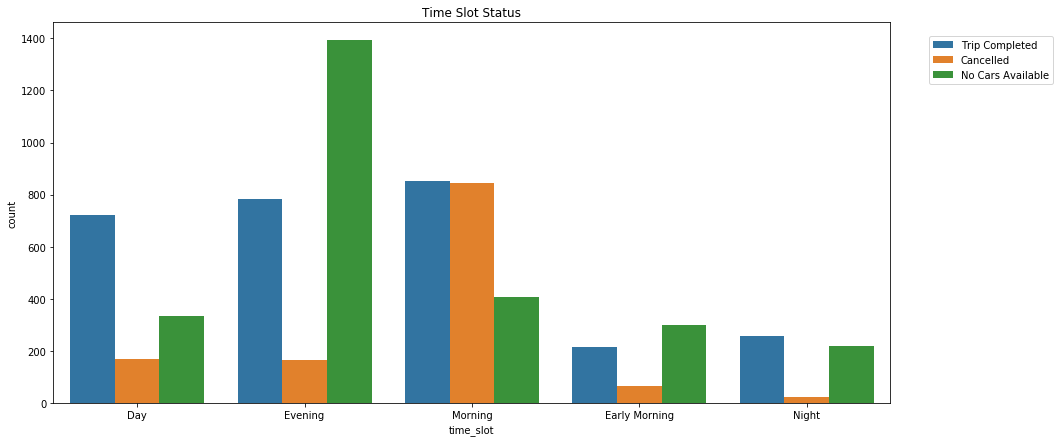

In [218]:
# time slot and trip status comparison
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Time Slot Status")
ax = sns.countplot(x = "time_slot", hue = "Status", data = df)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

-  ### higest number of "cancellations" are in the "Morning Time slot"
-  ### higest number of "cab unavailibility" is in "Evening time slot"

In [219]:
morning= df[df.time_slot == "Morning"]

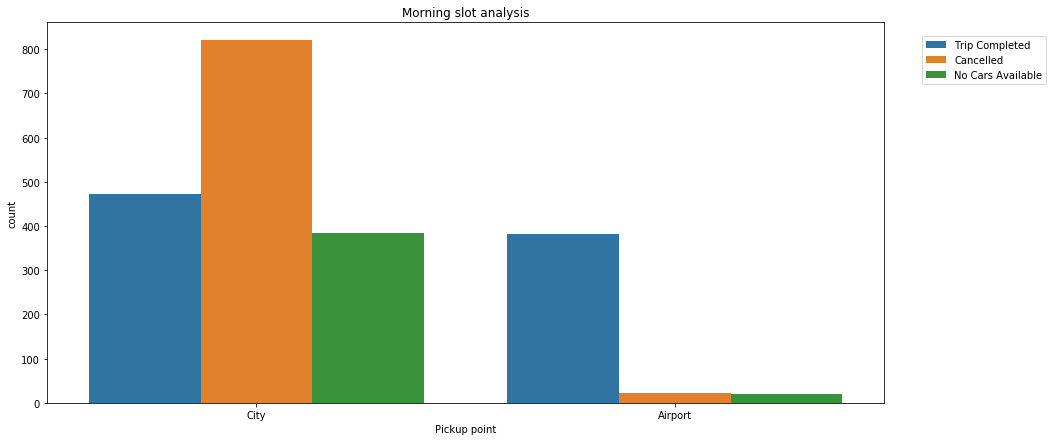

In [220]:
# Analysing trip status in morning slot
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Morning slot analysis")
sns.countplot(x="Pickup point", hue="Status", data =morning)
plt.legend( loc='right',bbox_to_anchor=(1.2, 0.9))

In [221]:
evening= df[df.time_slot == "Evening"]

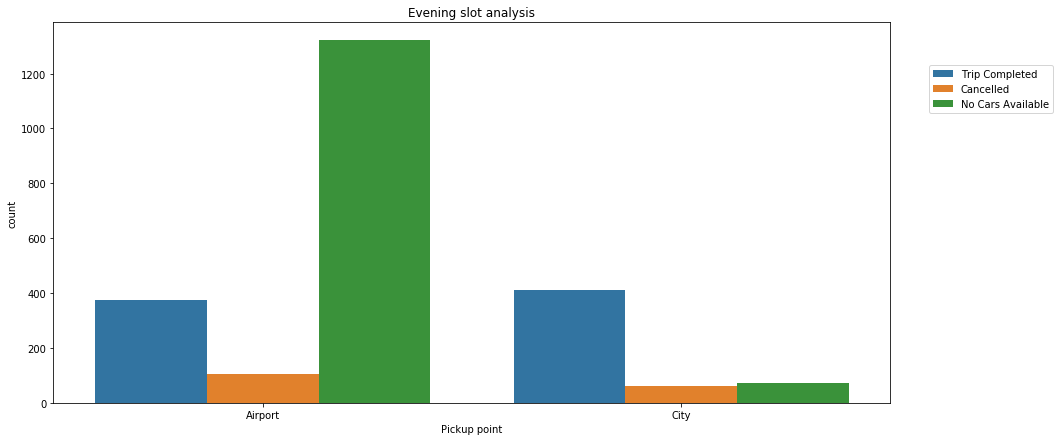

In [222]:
# Analysing trip status in evening slot
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Evening slot analysis")
sns.countplot(x="Pickup point", hue="Status", data =evening)
plt.legend( loc='best',bbox_to_anchor=(1.2, 0.9))

# Demand-Supply

-  ### Data is of five days

In [223]:
# Finding first and last date in dataset
print("last datetime=",df["Request timestamp"].max())
print("first datetime=",df["Request timestamp"].min())

last datetime= 2016-07-15 23:59:58
first datetime= 2016-07-11 00:00:00


In [224]:
supply_demand = pd.DataFrame({'Total Drivers':[df['Driver id'].nunique()], 
                                'Demand Per Day':[df['Request id'].nunique()/5],
                                'Trips Completed Per Day':df[(df['Status']=='Trip Completed')].shape[0]/5})
supply_demand

,Total Drivers,Demand Per Day,Trips Completed Per Day
0,300,1349.0,566.2


- ### Demand- Supply at City

##### evening data

In [225]:
#trips completed
evening.loc[(evening["Pickup point"]=="City") & (evening["Status"].isin(["Trip Completed"]))].shape[0]

411

In [226]:
# trips cancelled
evening.loc[(evening["Pickup point"]=="City") & (evening["Status"].isin(["Cancelled"]))].shape[0]

60

In [227]:
# trips when cab unavailable
evening.loc[(evening["Pickup point"]=="City") & (evening["Status"].isin(["No Cars Available"]))].shape[0]

71

In [228]:
# Total requests
evening.loc[(evening["Pickup point"]=="City")].shape[0]

542

#### morning data

In [229]:
morning.loc[(morning["Pickup point"]=="City") & (morning["Status"].isin(["Trip Completed"]))].shape[0]

472

In [230]:
morning.loc[(morning["Pickup point"]=="City") & (morning["Status"].isin(["Cancelled"]))].shape[0]

820

In [231]:
morning.loc[(morning["Pickup point"]=="City") & (morning["Status"].isin(["No Cars Available"]))].shape[0]

385

In [232]:
# Total requests
morning.loc[(morning["Pickup point"]=="City")].shape[0]

1677

- ### Demand- Supply at Airport

##### evening data

In [234]:
#trips completed
evening.loc[(evening["Pickup point"]=="Airport") & (evening["Status"].isin(["Trip Completed"]))].shape[0]

373

In [235]:
# trips cancelled
evening.loc[(evening["Pickup point"]=="Airport") & (evening["Status"].isin(["Cancelled"]))].shape[0]

106

In [236]:
# trips when cab unavailable
evening.loc[(evening["Pickup point"]=="Airport") & (evening["Status"].isin(["No Cars Available"]))].shape[0]

1321

In [237]:
# Total requests
evening.loc[(evening["Pickup point"]=="Airport")].shape[0]

1800

##### morning data

In [238]:
morning.loc[(morning["Pickup point"]=="Airport") & (morning["Status"].isin(["Trip Completed"]))].shape[0]

382

In [239]:
morning.loc[(morning["Pickup point"]=="Airport") & (morning["Status"].isin(["Cancelled"]))].shape[0]

23

In [240]:
morning.loc[(morning["Pickup point"]=="Airport") & (morning["Status"].isin(["No Cars Available"]))].shape[0]

21

In [241]:
# Total requests
morning.loc[(morning["Pickup point"]=="Airport")].shape[0]

426

From the visualisations we see that 
We see that most severe gap in Suppy-demand is in the early morning hours from City to Airport and from Airport to city the gap is severe during the evening and night hours.

## Suggestions
1. Give incentive to the cab drivers to work at high demand hours by increasing rates from City to airport during Early morning hours and from Airport to City during evening and night hours.
2. Direct cabs from city towards the airport starting late afternoon.
3. Direct cabs towards the city from the airport to spuuly high demand at Early morning hours. 
4. Evaluate reasons for high cancellations.